<a href="https://colab.research.google.com/github/2403a54128/NLP/blob/main/ASSI_10(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
!pip install gensim
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.9 MB/s eta 0:00:00


# Load Pre-trained Embedding Model

In [4]:

model = api.load("glove-wiki-gigaword-50")
print("Vocabulary Size:", len(model.key_to_index))
print("\nVector for word 'king':")
print(model['king'])


[==================================================] 100.0% 66.0/66.0MB downloaded
Vocabulary Size: 400000

Vector for word 'king':
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


# Select Word List (40 Words)

In [5]:
words = [
    # Animals
    "cat", "dog", "lion", "tiger", "elephant", "horse",
    "monkey", "cow", "goat", "rabbit",

    # Fruits
    "apple", "banana", "mango", "grape", "orange",
    "pineapple", "papaya", "peach",

    # Countries
    "india", "china", "usa", "germany", "france",
    "japan", "canada", "brazil",

    # Technology
    "computer", "laptop", "keyboard", "mouse",
    "internet", "software", "hardware", "mobile",

    # Royalty
    "king", "queen", "prince", "princess",

    # Vehicles
    "car", "bus", "train", "bicycle"
]


## Apply t-SNE

In [7]:
vectors = np.array([model[word] for word in words])
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_vectors = tsne.fit_transform(vectors)

print("Original Shape:", vectors.shape)
print("Reduced Shape:", reduced_vectors.shape)

Original Shape: (42, 50)
Reduced Shape: (42, 2)


# Plot Visualization

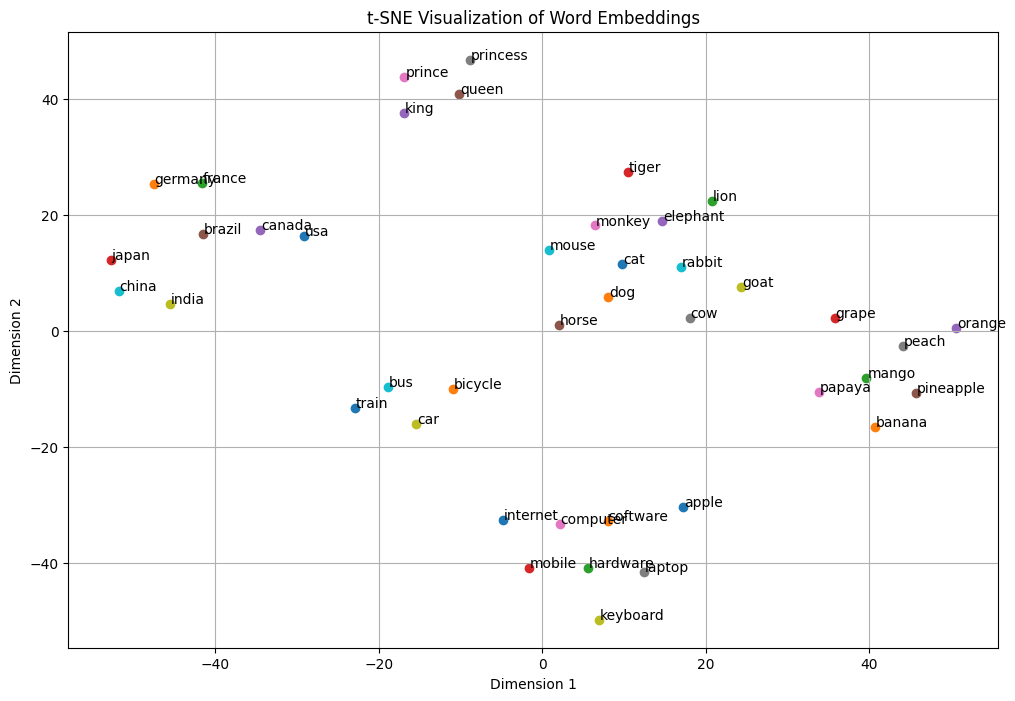

In [8]:
plt.figure(figsize=(12,8))

for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x+0.1, y+0.1, word)

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
